In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns 
from matplotlib import pyplot as plt

In [7]:
#data collection and analysis
data=pd.read_csv('diabetes.csv')

In [8]:
#taking first five data set
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [10]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
#measure regarding dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


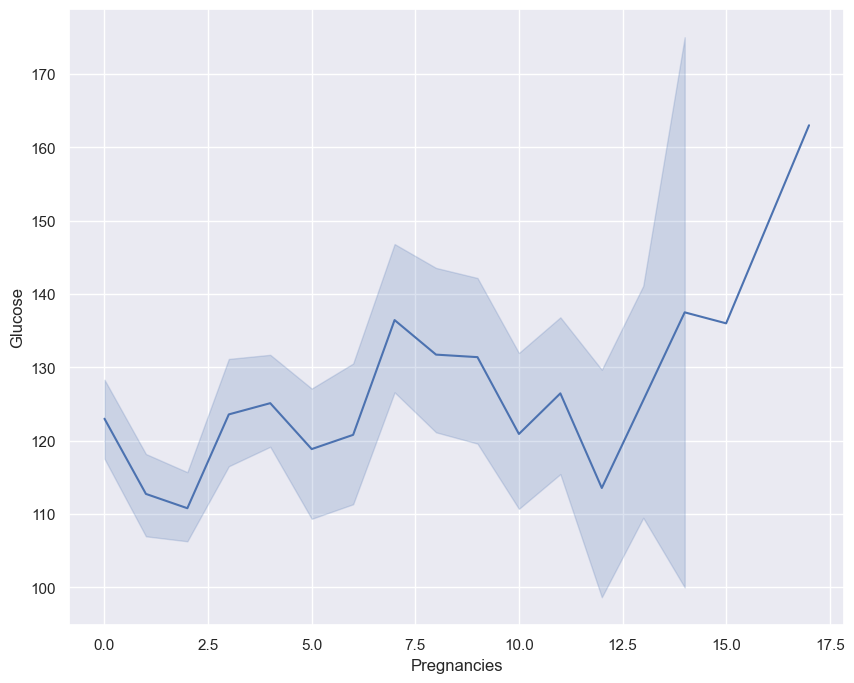

In [59]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Pregnancies',y='Glucose',data=data)
plt.show()

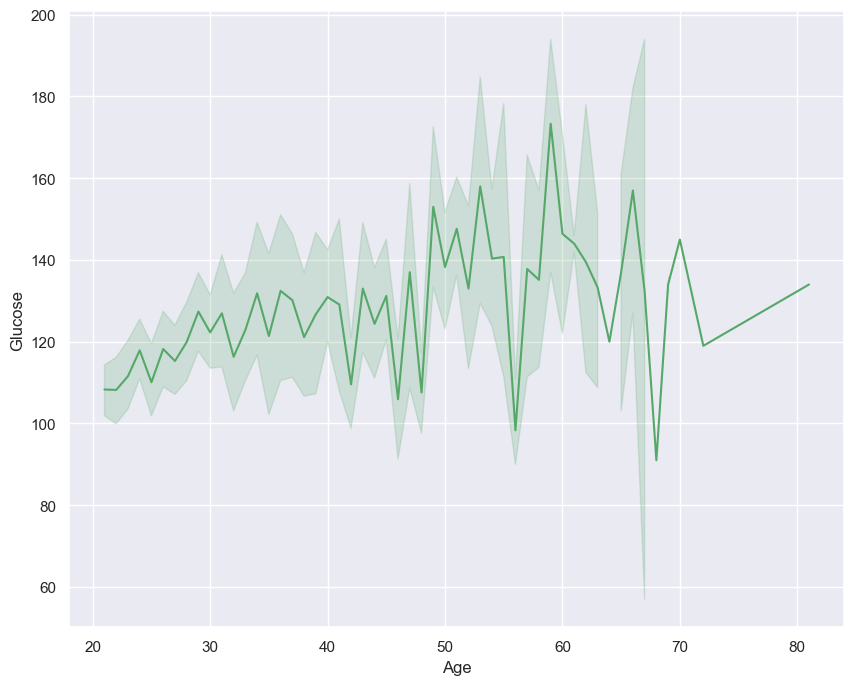

In [62]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Age',y='Glucose',data=data,color='g')
plt.show()

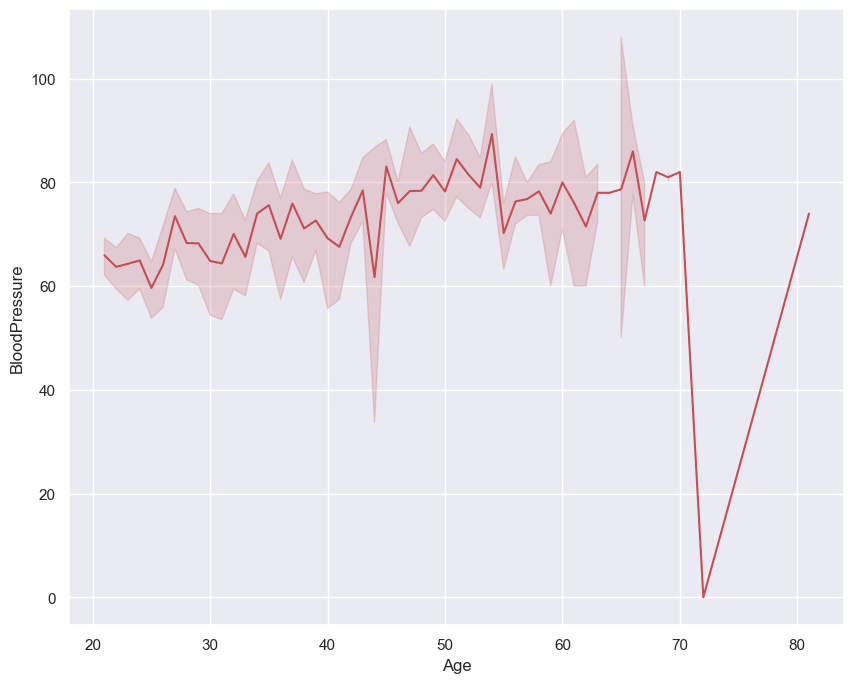

In [61]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='Age',y='BloodPressure',data=data,color='r')
plt.show()

In [12]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
#0 represent non diabetic people
#1 represent diabetic people
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
#seperating variable in x and y
x=data.drop(columns ='Outcome',axis=1)
y=data['Outcome']

In [18]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
#standardization
scaler = StandardScaler()

In [26]:
scaler.fit(x)

StandardScaler()

In [27]:
standardized_data = scaler.transform(x)

In [28]:
standardized_data #this will help in better pridiction

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
#train and split data model trainning giving either 30% or 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify = y , random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [31]:
#training the model using support vector machine model
classifier = svm.SVC(kernel ='linear')

In [32]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
#model evaluation
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [35]:
#accuracy of the trainning data (how well model is performing)
training_data_accuracy

0.7833876221498371

In [41]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction , y_test)

In [42]:
#test data accuracy
test_data_accuracy

0.7727272727272727

In [55]:
# changing data as numpy array 
input_data = (10,168,74,0,0,38,0.537,34)
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance #(1,-1) parameter this for prediction 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
std_data



C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.82781311,  1.4742667 ,  0.25303625, -1.28821221, -0.69289057,
         0.76245745,  0.1966813 ,  0.06459135]])

In [57]:
prediction = classifier.predict(std_data)

C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [58]:
prediction

array([0], dtype=int64)

In [56]:
if (prediction[0] == 0):
     print("person is not diabetic")
else:
    print("person is diabetic")

person is not diabetic
